In [116]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.image import imread
import os
import random
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dropout,  Flatten, Dense,MaxPool2D
 #for explainable
from skimage.segmentation import mark_boundaries
import lime
from lime import lime_image

In [117]:
data_path = r'C:\Users\Lance\Python class\covid'
train_path = r'C:\Users\Lance\Python class\covid\train'
test_path = r'C:\Users\Lance\Python class\covid\test'
os.listdir(train_path)

['Covid', 'Normal', 'Viral Pneumonia']

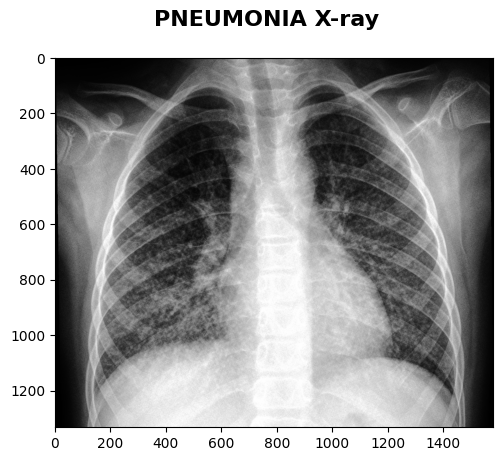

In [118]:
pneumonia_sample = imread(train_path+"/Viral Pneumonia"+"/01.jpeg")
plt.imshow(pneumonia_sample)
plt.suptitle('PNEUMONIA X-ray', fontsize=16, weight='bold');

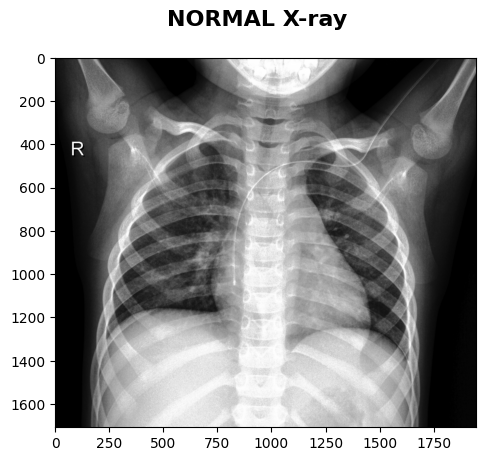

In [119]:
normal_sample = imread(train_path+"/Normal"+"/01.jpeg")
plt.imshow(normal_sample)
plt.suptitle('NORMAL X-ray', fontsize=16, weight='bold');

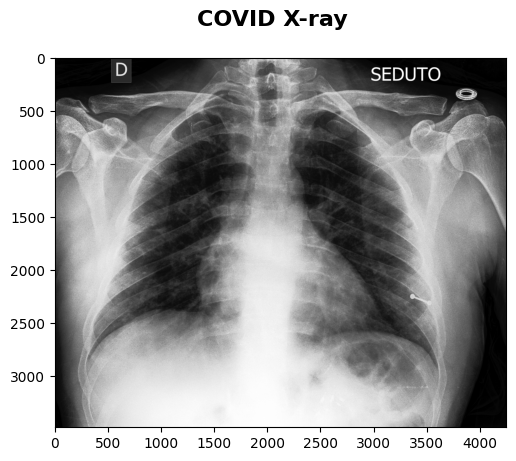

In [120]:
covid_sample = imread(train_path+"/Covid"+"/01.jpeg")
plt.imshow(covid_sample)
plt.suptitle('COVID X-ray', fontsize=16, weight='bold');

In [121]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   rotation_range=15,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical',
                                                 shuffle=True)

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical',
                                            shuffle = False)

Found 249 images belonging to 3 classes.
Found 65 images belonging to 3 classes.


In [122]:
image_size = (224,224,3)

model = Sequential()
model.add(Conv2D(64,(3,3),activation = "relu", input_shape = image_size))
model.add(MaxPool2D())

model.add(Conv2D( 128, (3,3), activation = "relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D( 256,(3,3), activation = "relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D( 512,(3,3), activation = "relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.15))

model.add(Dense(3, activation = "softmax"))


model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 111, 111, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 54, 54, 128)      0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 54, 54, 128)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 256)      

In [123]:
history = model.fit(training_set, validation_data=test_set,steps_per_epoch=16,epochs=100)

Epoch 1/100
16/16 [==============================] - 43s 3s/step - loss: 1.8688 - accuracy: 0.3936 - val_loss: 1.0910 - val_accuracy: 0.5077
Epoch 2/100
16/16 [==============================] - 39s 2s/step - loss: 1.0181 - accuracy: 0.5100 - val_loss: 0.8001 - val_accuracy: 0.6615
Epoch 3/100
16/16 [==============================] - 39s 2s/step - loss: 0.5200 - accuracy: 0.7831 - val_loss: 0.8406 - val_accuracy: 0.6154
Epoch 4/100
16/16 [==============================] - 40s 2s/step - loss: 0.5302 - accuracy: 0.7871 - val_loss: 0.5001 - val_accuracy: 0.7692
Epoch 5/100
16/16 [==============================] - 39s 2s/step - loss: 0.4189 - accuracy: 0.8313 - val_loss: 0.4554 - val_accuracy: 0.8462
Epoch 6/100
16/16 [==============================] - 39s 2s/step - loss: 0.3526 - accuracy: 0.8474 - val_loss: 0.4700 - val_accuracy: 0.7846
Epoch 7/100
16/16 [==============================] - 40s 2s/step - loss: 0.3884 - accuracy: 0.8635 - val_loss: 0.8015 - val_accuracy: 0.6308
Epoch 8/100
1

Epoch 59/100
16/16 [==============================] - 42s 3s/step - loss: 0.1571 - accuracy: 0.9317 - val_loss: 0.2896 - val_accuracy: 0.9077
Epoch 60/100
16/16 [==============================] - 42s 3s/step - loss: 0.1250 - accuracy: 0.9558 - val_loss: 0.3355 - val_accuracy: 0.9231
Epoch 61/100
16/16 [==============================] - 42s 3s/step - loss: 0.1734 - accuracy: 0.9478 - val_loss: 0.4857 - val_accuracy: 0.8923
Epoch 62/100
16/16 [==============================] - 42s 3s/step - loss: 0.1593 - accuracy: 0.9357 - val_loss: 0.4049 - val_accuracy: 0.9077
Epoch 63/100
16/16 [==============================] - 43s 3s/step - loss: 0.1517 - accuracy: 0.9357 - val_loss: 0.3885 - val_accuracy: 0.9077
Epoch 64/100
16/16 [==============================] - 40s 3s/step - loss: 0.0997 - accuracy: 0.9558 - val_loss: 0.4697 - val_accuracy: 0.9077
Epoch 65/100
16/16 [==============================] - 41s 3s/step - loss: 0.1027 - accuracy: 0.9518 - val_loss: 0.5421 - val_accuracy: 0.8615
Epoch 

In [124]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.9477911591529846
validation_accuracy 0.9076923131942749


<AxesSubplot: >

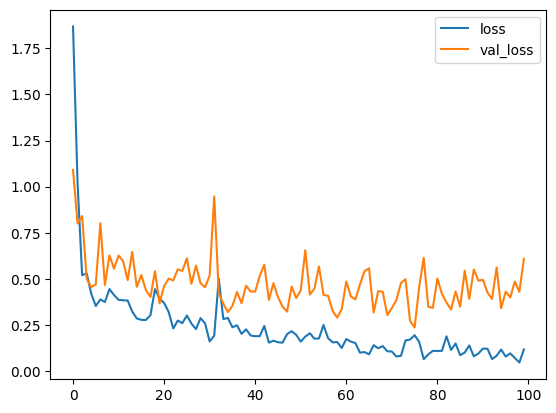

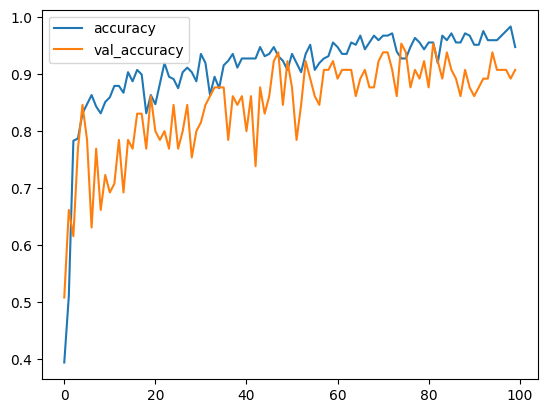

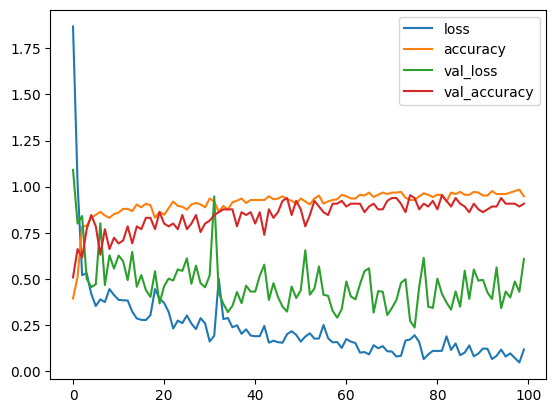

In [125]:
losses = pd.DataFrame(history.history)
losses.head()
losses[['loss','val_loss']].plot() 
losses[['accuracy','val_accuracy']].plot() 
losses.plot()

In [126]:
model.save('classification.h5')

5/5 [==============================] - 2s 406ms/step


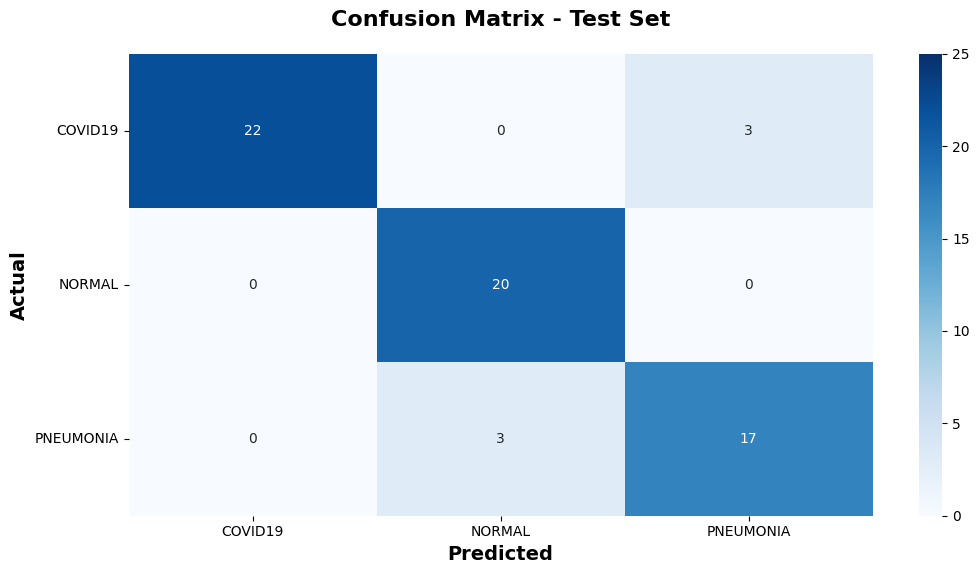

In [127]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support, accuracy_score


classes = ["COVID19", "NORMAL", "PNEUMONIA"]

y_pred = model.predict(test_set)
predictions = np.array(list(map(lambda x: np.argmax(x), y_pred)))

y_true=test_set.classes

CMatrix = pd.DataFrame(confusion_matrix(y_true, predictions), columns=classes, index =classes)

plt.figure(figsize=(12, 6))
ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 25,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20);

In [128]:
print(classification_report(y_true, predictions))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        25
           1       0.87      1.00      0.93        20
           2       0.85      0.85      0.85        20

    accuracy                           0.91        65
   macro avg       0.91      0.91      0.91        65
weighted avg       0.91      0.91      0.91        65



In [129]:
class_dict = {0:'Covid',
              1:'Normal',
              2:'Viral Pneumonia'}

1/1 [==============================] - 0s 155ms/step
prediction:  Covid


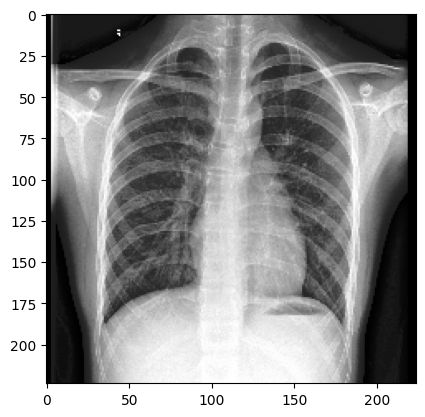

In [130]:
file_path =  '/validation/pic1.jpeg'
test_image = cv2.imread(data_path + file_path)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

1/1 [==============================] - 0s 69ms/step
prediction:  Covid


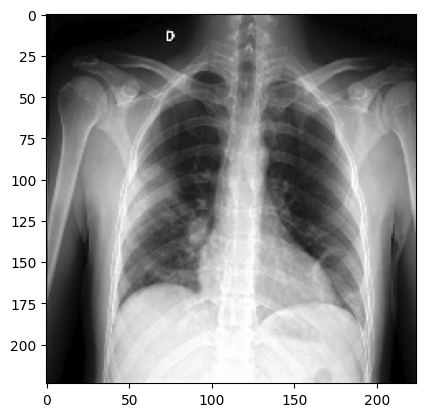

In [131]:
file_path =  '/validation/pic2.jpeg'
test_image = cv2.imread(data_path + file_path)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

1/1 [==============================] - 0s 77ms/step
prediction:  Viral Pneumonia


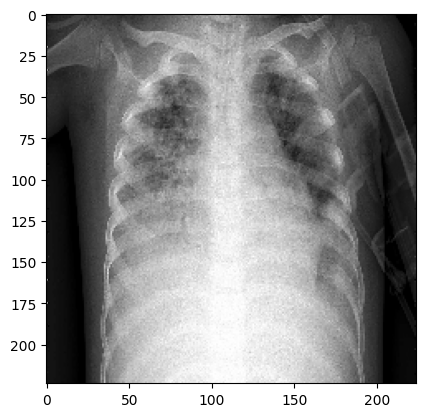

In [132]:
file_path =  '/validation/pic3.jpeg'
test_image = cv2.imread(data_path + file_path)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

1/1 [==============================] - 0s 83ms/step
prediction:  Viral Pneumonia


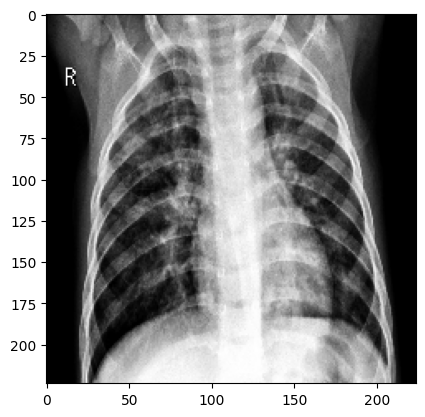

In [133]:
file_path =  '/validation/pic4.jpeg'
test_image = cv2.imread(data_path + file_path)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

1/1 [==============================] - 0s 68ms/step
prediction:  Viral Pneumonia


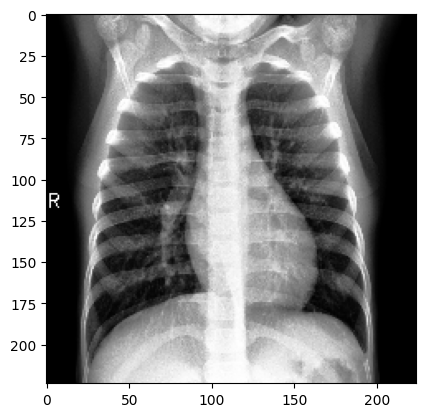

In [134]:
file_path =  '/validation/pic5.jpeg'
test_image = cv2.imread(data_path + file_path)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

1/1 [==============================] - 0s 70ms/step
prediction:  Covid


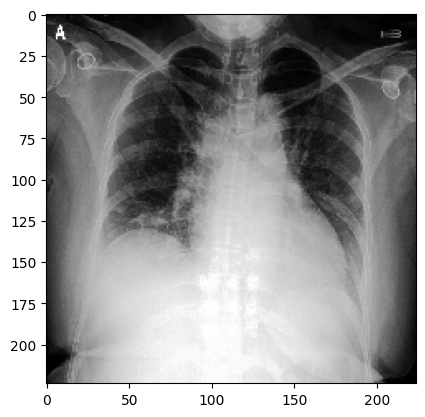

In [135]:
file_path =  '/validation/pic6.jpeg'
test_image = cv2.imread(data_path + file_path)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

1/1 [==============================] - 0s 68ms/step
prediction:  Covid


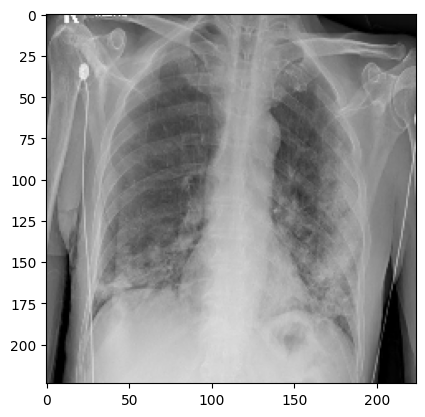

In [136]:
file_path =  '/validation/pic7.jpg'
test_image = cv2.imread(data_path + file_path)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

1/1 [==============================] - 0s 68ms/step
prediction:  Viral Pneumonia


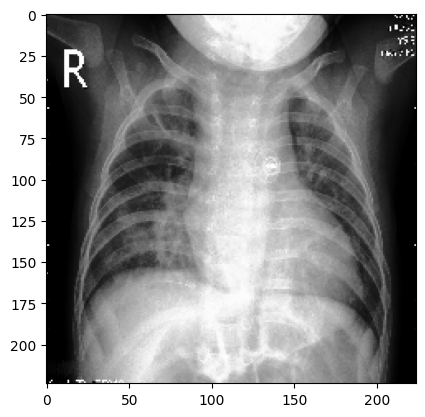

In [137]:
file_path =  '/validation/pic8.jpeg'
test_image = cv2.imread(data_path + file_path)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

1/1 [==============================] - 0s 69ms/step
prediction:  Covid


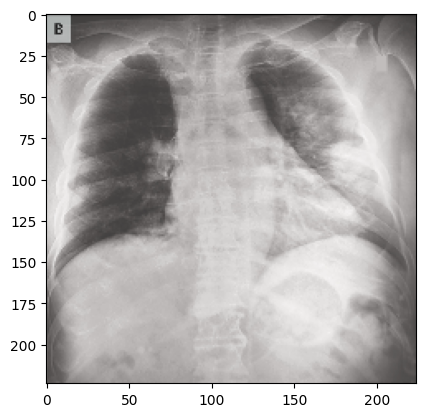

In [138]:
file_path =  '/validation/pic9.jpeg'
test_image = cv2.imread(data_path + file_path)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

1/1 [==============================] - 0s 71ms/step
prediction:  Covid


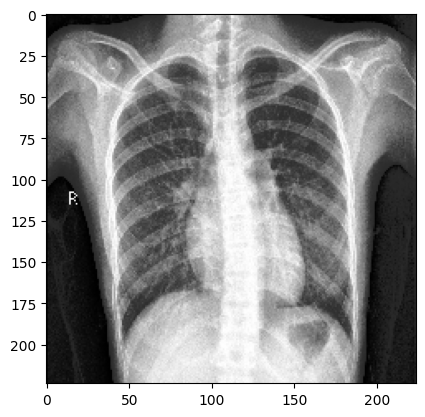

In [139]:
file_path =  '/validation/pic10.jpeg'
test_image = cv2.imread(data_path + file_path)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

In [140]:
def find_true_class(file_path):
    true_class = None
    if 'COVID19' in file_path:
        true_class = 'COVID19'
    elif 'PNEUMONIA' in file_path:
        true_class = 'PNEUMONIA'
    elif 'NORMAL' in file_path:
        true_class = 'NORMAL'
    return true_class

In [141]:
def visualize(file_path,ax,text_loc):
    test_image = cv2.imread(data_path + file_path)
    test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
    test_image = np.expand_dims(test_image,axis=0)
    probs = model.predict(test_image)
    pred_class = np.argmax(probs)
    pred_class = class_dict[pred_class]

    explainer = lime_image.LimeImageExplainer()
    explanation = explainer.explain_instance(test_image[0], model.predict, top_labels=5, hide_color=0, num_samples=1000)
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)


    ax.imshow(mark_boundaries(temp, mask))
    fig.text(text_loc, 0.9, "Predicted Class: " + pred_class , fontsize=13)
    true_class = find_true_class(file_path)
    if true_class is not None:
        fig.text(text_loc, 0.86, "Actual Class: " + true_class , fontsize=13)

1/1 [==============================] - 0s 75ms/step


  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 337ms/step


  1%|▊                                                                               | 10/1000 [00:00<00:39, 24.82it/s]

1/1 [==============================] - 0s 347ms/step


  2%|█▌                                                                              | 20/1000 [00:00<00:40, 24.33it/s]

1/1 [==============================] - 0s 333ms/step


  3%|██▍                                                                             | 30/1000 [00:01<00:39, 24.80it/s]

1/1 [==============================] - 0s 352ms/step


  4%|███▏                                                                            | 40/1000 [00:01<00:39, 24.44it/s]

1/1 [==============================] - 0s 334ms/step


  5%|████                                                                            | 50/1000 [00:02<00:38, 24.62it/s]

1/1 [==============================] - 0s 316ms/step


  6%|████▊                                                                           | 60/1000 [00:02<00:37, 25.19it/s]

1/1 [==============================] - 0s 331ms/step


  7%|█████▌                                                                          | 70/1000 [00:02<00:37, 25.07it/s]

1/1 [==============================] - 0s 330ms/step


  8%|██████▍                                                                         | 80/1000 [00:03<00:36, 25.15it/s]

1/1 [==============================] - 0s 347ms/step


  9%|███████▏                                                                        | 90/1000 [00:03<00:36, 24.83it/s]

1/1 [==============================] - 0s 337ms/step


 10%|███████▉                                                                       | 100/1000 [00:04<00:36, 24.89it/s]

1/1 [==============================] - 0s 333ms/step


 11%|████████▋                                                                      | 110/1000 [00:04<00:35, 24.81it/s]

1/1 [==============================] - 0s 326ms/step


 12%|█████████▍                                                                     | 120/1000 [00:04<00:35, 24.96it/s]

1/1 [==============================] - 0s 330ms/step


 13%|██████████▎                                                                    | 130/1000 [00:05<00:34, 25.17it/s]

1/1 [==============================] - 0s 353ms/step


 14%|███████████                                                                    | 140/1000 [00:05<00:34, 24.76it/s]

1/1 [==============================] - 0s 332ms/step


 15%|███████████▊                                                                   | 150/1000 [00:06<00:34, 25.00it/s]

1/1 [==============================] - 0s 317ms/step


 16%|████████████▋                                                                  | 160/1000 [00:06<00:33, 25.25it/s]

1/1 [==============================] - 0s 327ms/step


 17%|█████████████▍                                                                 | 170/1000 [00:06<00:32, 25.28it/s]

1/1 [==============================] - 0s 324ms/step


 18%|██████████████▏                                                                | 180/1000 [00:07<00:32, 25.22it/s]

1/1 [==============================] - 0s 349ms/step


 19%|███████████████                                                                | 190/1000 [00:07<00:32, 24.87it/s]

1/1 [==============================] - 0s 335ms/step


 20%|███████████████▊                                                               | 200/1000 [00:08<00:32, 24.94it/s]

1/1 [==============================] - 0s 311ms/step


 21%|████████████████▌                                                              | 210/1000 [00:08<00:30, 25.50it/s]

1/1 [==============================] - 0s 324ms/step


 22%|█████████████████▍                                                             | 220/1000 [00:08<00:30, 25.32it/s]

1/1 [==============================] - 0s 329ms/step


 23%|██████████████████▏                                                            | 230/1000 [00:09<00:30, 25.33it/s]

1/1 [==============================] - 0s 347ms/step


 24%|██████████████████▉                                                            | 240/1000 [00:09<00:30, 24.92it/s]

1/1 [==============================] - 0s 338ms/step


 25%|███████████████████▊                                                           | 250/1000 [00:10<00:30, 24.82it/s]

1/1 [==============================] - 0s 313ms/step


 26%|████████████████████▌                                                          | 260/1000 [00:10<00:29, 25.19it/s]

1/1 [==============================] - 0s 330ms/step


 27%|█████████████████████▎                                                         | 270/1000 [00:10<00:29, 25.12it/s]

1/1 [==============================] - 0s 330ms/step


 28%|██████████████████████                                                         | 280/1000 [00:11<00:28, 25.14it/s]

1/1 [==============================] - 0s 335ms/step


 29%|██████████████████████▉                                                        | 290/1000 [00:11<00:28, 24.95it/s]

1/1 [==============================] - 0s 330ms/step


 30%|███████████████████████▋                                                       | 300/1000 [00:11<00:27, 25.10it/s]

1/1 [==============================] - 0s 313ms/step


 31%|████████████████████████▍                                                      | 310/1000 [00:12<00:27, 25.55it/s]

1/1 [==============================] - 0s 326ms/step


 32%|█████████████████████████▎                                                     | 320/1000 [00:12<00:26, 25.62it/s]

1/1 [==============================] - 0s 336ms/step


 33%|██████████████████████████                                                     | 330/1000 [00:13<00:26, 25.50it/s]

1/1 [==============================] - 0s 332ms/step


 34%|██████████████████████████▊                                                    | 340/1000 [00:13<00:26, 25.37it/s]

1/1 [==============================] - 0s 328ms/step


 35%|███████████████████████████▋                                                   | 350/1000 [00:13<00:25, 25.55it/s]

1/1 [==============================] - 0s 315ms/step


 36%|████████████████████████████▍                                                  | 360/1000 [00:14<00:24, 25.68it/s]

1/1 [==============================] - 0s 326ms/step


 37%|█████████████████████████████▏                                                 | 370/1000 [00:14<00:24, 25.76it/s]

1/1 [==============================] - 0s 332ms/step


 38%|██████████████████████████████                                                 | 380/1000 [00:15<00:24, 25.68it/s]

1/1 [==============================] - 0s 324ms/step


 39%|██████████████████████████████▊                                                | 390/1000 [00:15<00:23, 25.62it/s]

1/1 [==============================] - 0s 329ms/step


 40%|███████████████████████████████▌                                               | 400/1000 [00:15<00:23, 25.52it/s]

1/1 [==============================] - 0s 323ms/step


 41%|████████████████████████████████▍                                              | 410/1000 [00:16<00:23, 25.57it/s]

1/1 [==============================] - 0s 328ms/step


 42%|█████████████████████████████████▏                                             | 420/1000 [00:16<00:22, 25.47it/s]

1/1 [==============================] - 0s 331ms/step


 43%|█████████████████████████████████▉                                             | 430/1000 [00:17<00:22, 25.45it/s]

1/1 [==============================] - 0s 325ms/step


 44%|██████████████████████████████████▊                                            | 440/1000 [00:17<00:22, 25.45it/s]

1/1 [==============================] - 0s 329ms/step


 45%|███████████████████████████████████▌                                           | 450/1000 [00:17<00:21, 25.28it/s]

1/1 [==============================] - 0s 324ms/step


 46%|████████████████████████████████████▎                                          | 460/1000 [00:18<00:21, 25.40it/s]

1/1 [==============================] - 0s 334ms/step


 47%|█████████████████████████████████████▏                                         | 470/1000 [00:18<00:20, 25.46it/s]

1/1 [==============================] - 0s 331ms/step


 48%|█████████████████████████████████████▉                                         | 480/1000 [00:19<00:20, 25.36it/s]

1/1 [==============================] - 0s 319ms/step


 49%|██████████████████████████████████████▋                                        | 490/1000 [00:19<00:20, 25.42it/s]

1/1 [==============================] - 0s 337ms/step


 50%|███████████████████████████████████████▌                                       | 500/1000 [00:19<00:19, 25.24it/s]

1/1 [==============================] - 0s 333ms/step


 51%|████████████████████████████████████████▎                                      | 510/1000 [00:20<00:19, 25.26it/s]

1/1 [==============================] - 0s 336ms/step


 52%|█████████████████████████████████████████                                      | 520/1000 [00:20<00:18, 25.33it/s]

1/1 [==============================] - 0s 327ms/step


 53%|█████████████████████████████████████████▊                                     | 530/1000 [00:21<00:18, 25.48it/s]

1/1 [==============================] - 0s 322ms/step


 54%|██████████████████████████████████████████▋                                    | 540/1000 [00:21<00:17, 25.59it/s]

1/1 [==============================] - 0s 354ms/step


 55%|███████████████████████████████████████████▍                                   | 550/1000 [00:21<00:18, 24.94it/s]

1/1 [==============================] - 0s 336ms/step


 56%|████████████████████████████████████████████▏                                  | 560/1000 [00:22<00:17, 24.91it/s]

1/1 [==============================] - 0s 329ms/step


 57%|█████████████████████████████████████████████                                  | 570/1000 [00:22<00:17, 25.07it/s]

1/1 [==============================] - 0s 329ms/step


 58%|█████████████████████████████████████████████▊                                 | 580/1000 [00:23<00:16, 25.14it/s]

1/1 [==============================] - 0s 320ms/step


 59%|██████████████████████████████████████████████▌                                | 590/1000 [00:23<00:16, 25.34it/s]

1/1 [==============================] - 0s 339ms/step


 60%|███████████████████████████████████████████████▍                               | 600/1000 [00:23<00:15, 25.07it/s]

1/1 [==============================] - 0s 333ms/step


 61%|████████████████████████████████████████████████▏                              | 610/1000 [00:24<00:15, 25.01it/s]

1/1 [==============================] - 0s 334ms/step


 62%|████████████████████████████████████████████████▉                              | 620/1000 [00:24<00:15, 24.94it/s]

1/1 [==============================] - 0s 332ms/step


 63%|█████████████████████████████████████████████████▊                             | 630/1000 [00:24<00:14, 25.12it/s]

1/1 [==============================] - 0s 323ms/step


 64%|██████████████████████████████████████████████████▌                            | 640/1000 [00:25<00:14, 25.32it/s]

1/1 [==============================] - 0s 336ms/step


 65%|███████████████████████████████████████████████████▎                           | 650/1000 [00:25<00:13, 25.03it/s]

1/1 [==============================] - 0s 329ms/step


 66%|████████████████████████████████████████████████████▏                          | 660/1000 [00:26<00:13, 25.17it/s]

1/1 [==============================] - 0s 322ms/step


 67%|████████████████████████████████████████████████████▉                          | 670/1000 [00:26<00:12, 25.51it/s]

1/1 [==============================] - 0s 328ms/step


 68%|█████████████████████████████████████████████████████▋                         | 680/1000 [00:26<00:12, 25.61it/s]

1/1 [==============================] - 0s 318ms/step


 69%|██████████████████████████████████████████████████████▌                        | 690/1000 [00:27<00:11, 25.84it/s]

1/1 [==============================] - 0s 340ms/step


 70%|███████████████████████████████████████████████████████▎                       | 700/1000 [00:27<00:11, 25.60it/s]

1/1 [==============================] - 0s 328ms/step


 71%|████████████████████████████████████████████████████████                       | 710/1000 [00:28<00:11, 25.57it/s]

1/1 [==============================] - 0s 348ms/step


 72%|████████████████████████████████████████████████████████▉                      | 720/1000 [00:28<00:11, 25.26it/s]

1/1 [==============================] - 0s 323ms/step


 73%|█████████████████████████████████████████████████████████▋                     | 730/1000 [00:28<00:10, 25.44it/s]

1/1 [==============================] - 0s 316ms/step


 74%|██████████████████████████████████████████████████████████▍                    | 740/1000 [00:29<00:10, 25.55it/s]

1/1 [==============================] - 0s 351ms/step


 75%|███████████████████████████████████████████████████████████▎                   | 750/1000 [00:29<00:09, 25.10it/s]

1/1 [==============================] - 0s 335ms/step


 76%|████████████████████████████████████████████████████████████                   | 760/1000 [00:30<00:09, 24.88it/s]

1/1 [==============================] - 0s 332ms/step


 77%|████████████████████████████████████████████████████████████▊                  | 770/1000 [00:30<00:09, 24.77it/s]

1/1 [==============================] - 0s 369ms/step


 78%|█████████████████████████████████████████████████████████████▌                 | 780/1000 [00:30<00:09, 24.20it/s]

1/1 [==============================] - 0s 326ms/step


 79%|██████████████████████████████████████████████████████████████▍                | 790/1000 [00:31<00:08, 24.56it/s]

1/1 [==============================] - 0s 336ms/step


 80%|███████████████████████████████████████████████████████████████▏               | 800/1000 [00:31<00:08, 24.53it/s]

1/1 [==============================] - 0s 327ms/step


 81%|███████████████████████████████████████████████████████████████▉               | 810/1000 [00:32<00:07, 24.91it/s]

1/1 [==============================] - 0s 322ms/step


 82%|████████████████████████████████████████████████████████████████▊              | 820/1000 [00:32<00:07, 25.29it/s]

1/1 [==============================] - 0s 341ms/step


 83%|█████████████████████████████████████████████████████████████████▌             | 830/1000 [00:32<00:06, 24.92it/s]

1/1 [==============================] - 0s 332ms/step


 84%|██████████████████████████████████████████████████████████████████▎            | 840/1000 [00:33<00:06, 24.76it/s]

1/1 [==============================] - 0s 335ms/step


 85%|███████████████████████████████████████████████████████████████████▏           | 850/1000 [00:33<00:06, 24.69it/s]

1/1 [==============================] - 0s 330ms/step


 86%|███████████████████████████████████████████████████████████████████▉           | 860/1000 [00:34<00:05, 24.78it/s]

1/1 [==============================] - 0s 343ms/step


 87%|████████████████████████████████████████████████████████████████████▋          | 870/1000 [00:34<00:05, 24.46it/s]

1/1 [==============================] - 0s 339ms/step


 88%|█████████████████████████████████████████████████████████████████████▌         | 880/1000 [00:35<00:04, 24.39it/s]

1/1 [==============================] - 0s 329ms/step


 89%|██████████████████████████████████████████████████████████████████████▎        | 890/1000 [00:35<00:04, 24.68it/s]

1/1 [==============================] - 0s 323ms/step


 90%|███████████████████████████████████████████████████████████████████████        | 900/1000 [00:35<00:04, 24.92it/s]

1/1 [==============================] - 0s 329ms/step


 91%|███████████████████████████████████████████████████████████████████████▉       | 910/1000 [00:36<00:03, 25.21it/s]

1/1 [==============================] - 0s 320ms/step


 92%|████████████████████████████████████████████████████████████████████████▋      | 920/1000 [00:36<00:03, 25.52it/s]

1/1 [==============================] - 0s 326ms/step


 93%|█████████████████████████████████████████████████████████████████████████▍     | 930/1000 [00:36<00:02, 25.68it/s]

1/1 [==============================] - 0s 317ms/step


 94%|██████████████████████████████████████████████████████████████████████████▎    | 940/1000 [00:37<00:02, 25.65it/s]

1/1 [==============================] - 0s 355ms/step


 95%|███████████████████████████████████████████████████████████████████████████    | 950/1000 [00:37<00:01, 25.18it/s]

1/1 [==============================] - 0s 328ms/step


 96%|███████████████████████████████████████████████████████████████████████████▊   | 960/1000 [00:38<00:01, 25.40it/s]

1/1 [==============================] - 0s 314ms/step


 97%|████████████████████████████████████████████████████████████████████████████▋  | 970/1000 [00:38<00:01, 25.74it/s]

1/1 [==============================] - 0s 323ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▍ | 980/1000 [00:38<00:00, 25.88it/s]

1/1 [==============================] - 0s 317ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▏| 990/1000 [00:39<00:00, 26.11it/s]

1/1 [==============================] - 0s 340ms/step


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:39<00:00, 25.20it/s]

1/1 [==============================] - 0s 70ms/step



  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 328ms/step


  1%|▊                                                                               | 10/1000 [00:00<00:39, 25.31it/s]

1/1 [==============================] - 0s 322ms/step


  2%|█▌                                                                              | 20/1000 [00:00<00:38, 25.43it/s]

1/1 [==============================] - 0s 323ms/step


  3%|██▍                                                                             | 30/1000 [00:01<00:38, 25.48it/s]

1/1 [==============================] - 0s 326ms/step


  4%|███▏                                                                            | 40/1000 [00:01<00:37, 25.57it/s]

1/1 [==============================] - 0s 318ms/step


  5%|████                                                                            | 50/1000 [00:01<00:36, 25.75it/s]

1/1 [==============================] - 0s 328ms/step


  6%|████▊                                                                           | 60/1000 [00:02<00:36, 25.65it/s]

1/1 [==============================] - 0s 329ms/step


  7%|█████▌                                                                          | 70/1000 [00:02<00:36, 25.67it/s]

1/1 [==============================] - 0s 341ms/step


  8%|██████▍                                                                         | 80/1000 [00:03<00:36, 25.35it/s]

1/1 [==============================] - 0s 323ms/step


  9%|███████▏                                                                        | 90/1000 [00:03<00:35, 25.52it/s]

1/1 [==============================] - 0s 316ms/step


 10%|███████▉                                                                       | 100/1000 [00:03<00:34, 25.78it/s]

1/1 [==============================] - 0s 329ms/step


 11%|████████▋                                                                      | 110/1000 [00:04<00:34, 25.61it/s]

1/1 [==============================] - 0s 331ms/step


 12%|█████████▍                                                                     | 120/1000 [00:04<00:34, 25.32it/s]

1/1 [==============================] - 0s 329ms/step


 13%|██████████▎                                                                    | 130/1000 [00:05<00:34, 25.39it/s]

1/1 [==============================] - 0s 338ms/step


 14%|███████████                                                                    | 140/1000 [00:05<00:34, 25.04it/s]

1/1 [==============================] - 0s 332ms/step


 15%|███████████▊                                                                   | 150/1000 [00:05<00:34, 24.92it/s]

1/1 [==============================] - 0s 324ms/step


 16%|████████████▋                                                                  | 160/1000 [00:06<00:33, 25.11it/s]

1/1 [==============================] - 0s 326ms/step


 17%|█████████████▍                                                                 | 170/1000 [00:06<00:32, 25.31it/s]

1/1 [==============================] - 0s 341ms/step


 18%|██████████████▏                                                                | 180/1000 [00:07<00:32, 25.20it/s]

1/1 [==============================] - 0s 352ms/step


 19%|███████████████                                                                | 190/1000 [00:07<00:32, 24.88it/s]

1/1 [==============================] - 0s 316ms/step


 20%|███████████████▊                                                               | 200/1000 [00:07<00:31, 25.25it/s]

1/1 [==============================] - 0s 322ms/step


 21%|████████████████▌                                                              | 210/1000 [00:08<00:31, 25.12it/s]

1/1 [==============================] - 0s 328ms/step


 22%|█████████████████▍                                                             | 220/1000 [00:08<00:30, 25.31it/s]

1/1 [==============================] - 0s 342ms/step


 23%|██████████████████▏                                                            | 230/1000 [00:09<00:30, 25.08it/s]

1/1 [==============================] - 0s 323ms/step


 24%|██████████████████▉                                                            | 240/1000 [00:09<00:30, 25.30it/s]

1/1 [==============================] - 0s 319ms/step


 25%|███████████████████▊                                                           | 250/1000 [00:09<00:29, 25.52it/s]

1/1 [==============================] - 0s 330ms/step


 26%|████████████████████▌                                                          | 260/1000 [00:10<00:29, 25.37it/s]

1/1 [==============================] - 0s 328ms/step


 27%|█████████████████████▎                                                         | 270/1000 [00:10<00:28, 25.28it/s]

1/1 [==============================] - 0s 327ms/step


 28%|██████████████████████                                                         | 280/1000 [00:11<00:28, 25.39it/s]

1/1 [==============================] - 0s 324ms/step


 29%|██████████████████████▉                                                        | 290/1000 [00:11<00:27, 25.47it/s]

1/1 [==============================] - 0s 316ms/step


 30%|███████████████████████▋                                                       | 300/1000 [00:11<00:27, 25.62it/s]

1/1 [==============================] - 0s 339ms/step


 31%|████████████████████████▍                                                      | 310/1000 [00:12<00:27, 25.09it/s]

1/1 [==============================] - 0s 327ms/step


 32%|█████████████████████████▎                                                     | 320/1000 [00:12<00:27, 25.09it/s]

1/1 [==============================] - 0s 324ms/step


 33%|██████████████████████████                                                     | 330/1000 [00:13<00:26, 25.33it/s]

1/1 [==============================] - 0s 323ms/step


 34%|██████████████████████████▊                                                    | 340/1000 [00:13<00:26, 25.32it/s]

1/1 [==============================] - 0s 315ms/step


 35%|███████████████████████████▋                                                   | 350/1000 [00:13<00:25, 25.47it/s]

1/1 [==============================] - 0s 330ms/step


 36%|████████████████████████████▍                                                  | 360/1000 [00:14<00:25, 25.50it/s]

1/1 [==============================] - 0s 327ms/step


 37%|█████████████████████████████▏                                                 | 370/1000 [00:14<00:24, 25.47it/s]

1/1 [==============================] - 0s 327ms/step


 38%|██████████████████████████████                                                 | 380/1000 [00:14<00:24, 25.56it/s]

1/1 [==============================] - 0s 337ms/step


 39%|██████████████████████████████▊                                                | 390/1000 [00:15<00:24, 25.19it/s]

1/1 [==============================] - 0s 319ms/step


 40%|███████████████████████████████▌                                               | 400/1000 [00:15<00:23, 25.50it/s]

1/1 [==============================] - 0s 319ms/step


 41%|████████████████████████████████▍                                              | 410/1000 [00:16<00:23, 25.34it/s]

1/1 [==============================] - 0s 324ms/step


 42%|█████████████████████████████████▏                                             | 420/1000 [00:16<00:22, 25.53it/s]

1/1 [==============================] - 0s 331ms/step


 43%|█████████████████████████████████▉                                             | 430/1000 [00:16<00:22, 25.32it/s]

1/1 [==============================] - 0s 324ms/step


 44%|██████████████████████████████████▊                                            | 440/1000 [00:17<00:22, 25.41it/s]

1/1 [==============================] - 0s 327ms/step


 45%|███████████████████████████████████▌                                           | 450/1000 [00:17<00:21, 25.48it/s]

1/1 [==============================] - 0s 325ms/step


 46%|████████████████████████████████████▎                                          | 460/1000 [00:18<00:21, 25.57it/s]

1/1 [==============================] - 0s 328ms/step


 47%|█████████████████████████████████████▏                                         | 470/1000 [00:18<00:20, 25.44it/s]

1/1 [==============================] - 0s 320ms/step


 48%|█████████████████████████████████████▉                                         | 480/1000 [00:18<00:20, 25.66it/s]

1/1 [==============================] - 0s 335ms/step


 49%|██████████████████████████████████████▋                                        | 490/1000 [00:19<00:20, 25.40it/s]

1/1 [==============================] - 0s 325ms/step


 50%|███████████████████████████████████████▌                                       | 500/1000 [00:19<00:19, 25.29it/s]

1/1 [==============================] - 0s 319ms/step


 51%|████████████████████████████████████████▎                                      | 510/1000 [00:20<00:19, 25.40it/s]

1/1 [==============================] - 0s 332ms/step


 52%|█████████████████████████████████████████                                      | 520/1000 [00:20<00:18, 25.29it/s]

1/1 [==============================] - 0s 316ms/step


 53%|█████████████████████████████████████████▊                                     | 530/1000 [00:20<00:18, 25.51it/s]

1/1 [==============================] - 0s 341ms/step


 54%|██████████████████████████████████████████▋                                    | 540/1000 [00:21<00:18, 25.08it/s]

1/1 [==============================] - 0s 327ms/step


 55%|███████████████████████████████████████████▍                                   | 550/1000 [00:21<00:17, 25.23it/s]

1/1 [==============================] - 0s 322ms/step


 56%|████████████████████████████████████████████▏                                  | 560/1000 [00:22<00:17, 25.35it/s]

1/1 [==============================] - 0s 321ms/step


 57%|█████████████████████████████████████████████                                  | 570/1000 [00:22<00:16, 25.46it/s]

1/1 [==============================] - 0s 316ms/step


 58%|█████████████████████████████████████████████▊                                 | 580/1000 [00:22<00:16, 25.46it/s]

1/1 [==============================] - 0s 338ms/step


 59%|██████████████████████████████████████████████▌                                | 590/1000 [00:23<00:16, 25.15it/s]

1/1 [==============================] - 0s 327ms/step


 60%|███████████████████████████████████████████████▍                               | 600/1000 [00:23<00:15, 25.07it/s]

1/1 [==============================] - 0s 323ms/step


 61%|████████████████████████████████████████████████▏                              | 610/1000 [00:24<00:15, 25.14it/s]

1/1 [==============================] - 0s 333ms/step


 62%|████████████████████████████████████████████████▉                              | 620/1000 [00:24<00:15, 25.12it/s]

1/1 [==============================] - 0s 317ms/step


 63%|█████████████████████████████████████████████████▊                             | 630/1000 [00:24<00:14, 25.47it/s]

1/1 [==============================] - 0s 336ms/step


 64%|██████████████████████████████████████████████████▌                            | 640/1000 [00:25<00:14, 25.25it/s]

1/1 [==============================] - 0s 325ms/step


 65%|███████████████████████████████████████████████████▎                           | 650/1000 [00:25<00:13, 25.30it/s]

1/1 [==============================] - 0s 323ms/step


 66%|████████████████████████████████████████████████████▏                          | 660/1000 [00:26<00:13, 25.33it/s]

1/1 [==============================] - 0s 321ms/step


 67%|████████████████████████████████████████████████████▉                          | 670/1000 [00:26<00:12, 25.54it/s]

1/1 [==============================] - 0s 319ms/step


 68%|█████████████████████████████████████████████████████▋                         | 680/1000 [00:26<00:12, 25.79it/s]

1/1 [==============================] - 0s 328ms/step


 69%|██████████████████████████████████████████████████████▌                        | 690/1000 [00:27<00:12, 25.41it/s]

1/1 [==============================] - 0s 331ms/step


 70%|███████████████████████████████████████████████████████▎                       | 700/1000 [00:27<00:11, 25.40it/s]

1/1 [==============================] - 0s 324ms/step


 71%|████████████████████████████████████████████████████████                       | 710/1000 [00:27<00:11, 25.36it/s]

1/1 [==============================] - 0s 320ms/step


 72%|████████████████████████████████████████████████████████▉                      | 720/1000 [00:28<00:11, 25.44it/s]

1/1 [==============================] - 0s 326ms/step


 73%|█████████████████████████████████████████████████████████▋                     | 730/1000 [00:28<00:10, 25.60it/s]

1/1 [==============================] - 0s 339ms/step


 74%|██████████████████████████████████████████████████████████▍                    | 740/1000 [00:29<00:10, 25.21it/s]

1/1 [==============================] - 0s 327ms/step


 75%|███████████████████████████████████████████████████████████▎                   | 750/1000 [00:29<00:09, 25.36it/s]

1/1 [==============================] - 0s 322ms/step


 76%|████████████████████████████████████████████████████████████                   | 760/1000 [00:29<00:09, 25.42it/s]

1/1 [==============================] - 0s 324ms/step


 77%|████████████████████████████████████████████████████████████▊                  | 770/1000 [00:30<00:09, 25.43it/s]

1/1 [==============================] - 0s 346ms/step


 78%|█████████████████████████████████████████████████████████████▌                 | 780/1000 [00:30<00:08, 24.96it/s]

1/1 [==============================] - 0s 334ms/step


 79%|██████████████████████████████████████████████████████████████▍                | 790/1000 [00:31<00:08, 24.75it/s]

1/1 [==============================] - 0s 328ms/step


 80%|███████████████████████████████████████████████████████████████▏               | 800/1000 [00:31<00:07, 25.02it/s]

1/1 [==============================] - 0s 324ms/step


 81%|███████████████████████████████████████████████████████████████▉               | 810/1000 [00:31<00:07, 25.13it/s]

1/1 [==============================] - 0s 351ms/step


 82%|████████████████████████████████████████████████████████████████▊              | 820/1000 [00:32<00:07, 24.69it/s]

1/1 [==============================] - 0s 326ms/step


 83%|█████████████████████████████████████████████████████████████████▌             | 830/1000 [00:32<00:06, 25.05it/s]

1/1 [==============================] - 0s 332ms/step


 84%|██████████████████████████████████████████████████████████████████▎            | 840/1000 [00:33<00:06, 25.05it/s]

1/1 [==============================] - 0s 336ms/step


 85%|███████████████████████████████████████████████████████████████████▏           | 850/1000 [00:33<00:06, 24.98it/s]

1/1 [==============================] - 0s 321ms/step


 86%|███████████████████████████████████████████████████████████████████▉           | 860/1000 [00:33<00:05, 25.25it/s]

1/1 [==============================] - 0s 324ms/step


 87%|████████████████████████████████████████████████████████████████████▋          | 870/1000 [00:34<00:05, 25.29it/s]

1/1 [==============================] - 0s 327ms/step


 88%|█████████████████████████████████████████████████████████████████████▌         | 880/1000 [00:34<00:04, 25.28it/s]

1/1 [==============================] - 0s 342ms/step


 89%|██████████████████████████████████████████████████████████████████████▎        | 890/1000 [00:35<00:04, 24.80it/s]

1/1 [==============================] - 0s 325ms/step


 90%|███████████████████████████████████████████████████████████████████████        | 900/1000 [00:35<00:04, 24.98it/s]

1/1 [==============================] - 0s 318ms/step


 91%|███████████████████████████████████████████████████████████████████████▉       | 910/1000 [00:35<00:03, 25.29it/s]

1/1 [==============================] - 0s 324ms/step


 92%|████████████████████████████████████████████████████████████████████████▋      | 920/1000 [00:36<00:03, 25.36it/s]

1/1 [==============================] - 0s 338ms/step


 93%|█████████████████████████████████████████████████████████████████████████▍     | 930/1000 [00:36<00:02, 25.11it/s]

1/1 [==============================] - 0s 331ms/step


 94%|██████████████████████████████████████████████████████████████████████████▎    | 940/1000 [00:37<00:02, 25.01it/s]

1/1 [==============================] - 0s 324ms/step


 95%|███████████████████████████████████████████████████████████████████████████    | 950/1000 [00:37<00:01, 25.10it/s]

1/1 [==============================] - 0s 317ms/step


 96%|███████████████████████████████████████████████████████████████████████████▊   | 960/1000 [00:37<00:01, 25.34it/s]

1/1 [==============================] - 0s 326ms/step


 97%|████████████████████████████████████████████████████████████████████████████▋  | 970/1000 [00:38<00:01, 25.28it/s]

1/1 [==============================] - 0s 326ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▍ | 980/1000 [00:38<00:00, 25.37it/s]

1/1 [==============================] - 0s 357ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▏| 990/1000 [00:39<00:00, 24.46it/s]

1/1 [==============================] - 0s 381ms/step


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:39<00:00, 25.23it/s]

1/1 [==============================] - 0s 72ms/step



  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 332ms/step


  1%|▊                                                                               | 10/1000 [00:00<00:39, 25.31it/s]

1/1 [==============================] - 0s 351ms/step


  2%|█▌                                                                              | 20/1000 [00:00<00:39, 24.55it/s]

1/1 [==============================] - 0s 339ms/step


  3%|██▍                                                                             | 30/1000 [00:01<00:39, 24.63it/s]

1/1 [==============================] - 0s 338ms/step


  4%|███▏                                                                            | 40/1000 [00:01<00:38, 24.67it/s]

1/1 [==============================] - 0s 350ms/step


  5%|████                                                                            | 50/1000 [00:02<00:38, 24.42it/s]

1/1 [==============================] - 0s 366ms/step


  6%|████▊                                                                           | 60/1000 [00:02<00:39, 23.69it/s]

1/1 [==============================] - 0s 361ms/step


  7%|█████▌                                                                          | 70/1000 [00:02<00:39, 23.34it/s]

1/1 [==============================] - 0s 360ms/step


  8%|██████▍                                                                         | 80/1000 [00:03<00:39, 23.28it/s]

1/1 [==============================] - 0s 346ms/step


  9%|███████▏                                                                        | 90/1000 [00:03<00:38, 23.55it/s]

1/1 [==============================] - 0s 333ms/step


 10%|███████▉                                                                       | 100/1000 [00:04<00:37, 24.03it/s]

1/1 [==============================] - 0s 329ms/step


 11%|████████▋                                                                      | 110/1000 [00:04<00:36, 24.28it/s]

1/1 [==============================] - 0s 345ms/step


 12%|█████████▍                                                                     | 120/1000 [00:04<00:36, 24.19it/s]

1/1 [==============================] - 0s 339ms/step


 13%|██████████▎                                                                    | 130/1000 [00:05<00:35, 24.23it/s]

1/1 [==============================] - 0s 359ms/step


 14%|███████████                                                                    | 140/1000 [00:05<00:36, 23.88it/s]

1/1 [==============================] - 0s 337ms/step


 15%|███████████▊                                                                   | 150/1000 [00:06<00:35, 24.17it/s]

1/1 [==============================] - 0s 339ms/step


 16%|████████████▋                                                                  | 160/1000 [00:06<00:34, 24.28it/s]

1/1 [==============================] - 0s 337ms/step


 17%|█████████████▍                                                                 | 170/1000 [00:07<00:34, 24.33it/s]

1/1 [==============================] - 0s 330ms/step


 18%|██████████████▏                                                                | 180/1000 [00:07<00:33, 24.66it/s]

1/1 [==============================] - 0s 337ms/step


 19%|███████████████                                                                | 190/1000 [00:07<00:32, 24.58it/s]

1/1 [==============================] - 0s 340ms/step


 20%|███████████████▊                                                               | 200/1000 [00:08<00:32, 24.61it/s]

1/1 [==============================] - 0s 338ms/step


 21%|████████████████▌                                                              | 210/1000 [00:08<00:32, 24.53it/s]

1/1 [==============================] - 0s 334ms/step


 22%|█████████████████▍                                                             | 220/1000 [00:09<00:31, 24.58it/s]

1/1 [==============================] - 0s 327ms/step


 23%|██████████████████▏                                                            | 230/1000 [00:09<00:31, 24.73it/s]

1/1 [==============================] - 0s 339ms/step


 24%|██████████████████▉                                                            | 240/1000 [00:09<00:31, 24.43it/s]

1/1 [==============================] - 0s 336ms/step


 25%|███████████████████▊                                                           | 250/1000 [00:10<00:30, 24.64it/s]

1/1 [==============================] - 0s 336ms/step


 26%|████████████████████▌                                                          | 260/1000 [00:10<00:30, 24.39it/s]

1/1 [==============================] - 0s 334ms/step


 27%|█████████████████████▎                                                         | 270/1000 [00:11<00:29, 24.51it/s]

1/1 [==============================] - 0s 338ms/step


 28%|██████████████████████                                                         | 280/1000 [00:11<00:29, 24.62it/s]

1/1 [==============================] - 0s 328ms/step


 29%|██████████████████████▉                                                        | 290/1000 [00:11<00:28, 24.90it/s]

1/1 [==============================] - 0s 328ms/step


 30%|███████████████████████▋                                                       | 300/1000 [00:12<00:27, 25.12it/s]

1/1 [==============================] - 0s 341ms/step


 31%|████████████████████████▍                                                      | 310/1000 [00:12<00:27, 24.82it/s]

1/1 [==============================] - 0s 326ms/step


 32%|█████████████████████████▎                                                     | 320/1000 [00:13<00:27, 25.05it/s]

1/1 [==============================] - 0s 317ms/step


 33%|██████████████████████████                                                     | 330/1000 [00:13<00:26, 25.26it/s]

1/1 [==============================] - 0s 329ms/step


 34%|██████████████████████████▊                                                    | 340/1000 [00:13<00:26, 25.10it/s]

1/1 [==============================] - 0s 341ms/step


 35%|███████████████████████████▋                                                   | 350/1000 [00:14<00:26, 24.92it/s]

1/1 [==============================] - 0s 324ms/step


 36%|████████████████████████████▍                                                  | 360/1000 [00:14<00:25, 24.91it/s]

1/1 [==============================] - 0s 326ms/step


 37%|█████████████████████████████▏                                                 | 370/1000 [00:15<00:25, 25.03it/s]

1/1 [==============================] - 0s 314ms/step


 38%|██████████████████████████████                                                 | 380/1000 [00:15<00:24, 25.30it/s]

1/1 [==============================] - 0s 335ms/step


 39%|██████████████████████████████▊                                                | 390/1000 [00:15<00:24, 25.06it/s]

1/1 [==============================] - 0s 327ms/step


 40%|███████████████████████████████▌                                               | 400/1000 [00:16<00:23, 25.23it/s]

1/1 [==============================] - 0s 318ms/step


 41%|████████████████████████████████▍                                              | 410/1000 [00:16<00:23, 25.37it/s]

1/1 [==============================] - 0s 323ms/step


 42%|█████████████████████████████████▏                                             | 420/1000 [00:17<00:22, 25.38it/s]

1/1 [==============================] - 0s 331ms/step


 43%|█████████████████████████████████▉                                             | 430/1000 [00:17<00:22, 25.17it/s]

1/1 [==============================] - 0s 324ms/step


 44%|██████████████████████████████████▊                                            | 440/1000 [00:17<00:22, 25.21it/s]

1/1 [==============================] - 0s 326ms/step


 45%|███████████████████████████████████▌                                           | 450/1000 [00:18<00:21, 25.23it/s]

1/1 [==============================] - 0s 326ms/step


 46%|████████████████████████████████████▎                                          | 460/1000 [00:18<00:21, 25.33it/s]

1/1 [==============================] - 0s 327ms/step


 47%|█████████████████████████████████████▏                                         | 470/1000 [00:19<00:20, 25.37it/s]

1/1 [==============================] - 0s 319ms/step


 48%|█████████████████████████████████████▉                                         | 480/1000 [00:19<00:20, 25.56it/s]

1/1 [==============================] - 0s 327ms/step


 49%|██████████████████████████████████████▋                                        | 490/1000 [00:19<00:19, 25.57it/s]

1/1 [==============================] - 0s 333ms/step


 50%|███████████████████████████████████████▌                                       | 500/1000 [00:20<00:19, 25.43it/s]

1/1 [==============================] - 0s 346ms/step


 51%|████████████████████████████████████████▎                                      | 510/1000 [00:20<00:19, 25.06it/s]

1/1 [==============================] - 0s 333ms/step


 52%|█████████████████████████████████████████                                      | 520/1000 [00:21<00:26, 18.12it/s]

1/1 [==============================] - 0s 333ms/step


 53%|█████████████████████████████████████████▊                                     | 530/1000 [00:21<00:24, 19.14it/s]

1/1 [==============================] - 0s 331ms/step


 54%|██████████████████████████████████████████▋                                    | 540/1000 [00:22<00:22, 20.57it/s]

1/1 [==============================] - 0s 326ms/step


 55%|███████████████████████████████████████████▍                                   | 550/1000 [00:22<00:20, 21.87it/s]

1/1 [==============================] - 0s 321ms/step


 56%|████████████████████████████████████████████▏                                  | 560/1000 [00:23<00:19, 22.99it/s]

1/1 [==============================] - 0s 336ms/step


 57%|█████████████████████████████████████████████                                  | 570/1000 [00:23<00:18, 23.54it/s]

1/1 [==============================] - 0s 326ms/step


 58%|█████████████████████████████████████████████▊                                 | 580/1000 [00:23<00:17, 24.08it/s]

1/1 [==============================] - 0s 326ms/step


 59%|██████████████████████████████████████████████▌                                | 590/1000 [00:24<00:16, 24.55it/s]

1/1 [==============================] - 0s 323ms/step


 60%|███████████████████████████████████████████████▍                               | 600/1000 [00:24<00:16, 24.92it/s]

1/1 [==============================] - 0s 338ms/step


 61%|████████████████████████████████████████████████▏                              | 610/1000 [00:25<00:15, 24.97it/s]

1/1 [==============================] - 0s 332ms/step


 62%|████████████████████████████████████████████████▉                              | 620/1000 [00:25<00:15, 25.07it/s]

1/1 [==============================] - 0s 331ms/step


 63%|█████████████████████████████████████████████████▊                             | 630/1000 [00:25<00:14, 25.18it/s]

1/1 [==============================] - 0s 349ms/step


 64%|██████████████████████████████████████████████████▌                            | 640/1000 [00:26<00:14, 24.48it/s]

1/1 [==============================] - 0s 459ms/step


 65%|███████████████████████████████████████████████████▎                           | 650/1000 [00:26<00:15, 22.41it/s]

1/1 [==============================] - 0s 343ms/step


 66%|████████████████████████████████████████████████████▏                          | 660/1000 [00:27<00:15, 22.61it/s]

1/1 [==============================] - 0s 340ms/step


 67%|████████████████████████████████████████████████████▉                          | 670/1000 [00:27<00:14, 23.21it/s]

1/1 [==============================] - 0s 332ms/step


 68%|█████████████████████████████████████████████████████▋                         | 680/1000 [00:28<00:13, 23.71it/s]

1/1 [==============================] - 0s 370ms/step


 69%|██████████████████████████████████████████████████████▌                        | 690/1000 [00:28<00:13, 23.52it/s]

1/1 [==============================] - 0s 338ms/step


 70%|███████████████████████████████████████████████████████▎                       | 700/1000 [00:28<00:12, 23.94it/s]

1/1 [==============================] - 0s 342ms/step


 71%|████████████████████████████████████████████████████████                       | 710/1000 [00:29<00:12, 24.00it/s]

1/1 [==============================] - 0s 362ms/step


 72%|████████████████████████████████████████████████████████▉                      | 720/1000 [00:29<00:11, 23.66it/s]

1/1 [==============================] - 0s 375ms/step


 73%|█████████████████████████████████████████████████████████▋                     | 730/1000 [00:30<00:11, 23.30it/s]

1/1 [==============================] - 0s 382ms/step


 74%|██████████████████████████████████████████████████████████▍                    | 740/1000 [00:30<00:11, 22.70it/s]

1/1 [==============================] - 0s 362ms/step


 75%|███████████████████████████████████████████████████████████▎                   | 750/1000 [00:31<00:10, 22.74it/s]

1/1 [==============================] - 0s 344ms/step


 76%|████████████████████████████████████████████████████████████                   | 760/1000 [00:31<00:10, 23.12it/s]

1/1 [==============================] - 0s 335ms/step


 77%|████████████████████████████████████████████████████████████▊                  | 770/1000 [00:31<00:09, 23.61it/s]

1/1 [==============================] - 0s 322ms/step


 78%|█████████████████████████████████████████████████████████████▌                 | 780/1000 [00:32<00:09, 24.22it/s]

1/1 [==============================] - 0s 333ms/step


 79%|██████████████████████████████████████████████████████████████▍                | 790/1000 [00:32<00:08, 24.53it/s]

1/1 [==============================] - 0s 330ms/step


 80%|███████████████████████████████████████████████████████████████▏               | 800/1000 [00:33<00:08, 24.79it/s]

1/1 [==============================] - 0s 342ms/step


 81%|███████████████████████████████████████████████████████████████▉               | 810/1000 [00:33<00:07, 24.73it/s]

1/1 [==============================] - 0s 334ms/step


 82%|████████████████████████████████████████████████████████████████▊              | 820/1000 [00:33<00:07, 24.81it/s]

1/1 [==============================] - 0s 339ms/step


 83%|█████████████████████████████████████████████████████████████████▌             | 830/1000 [00:34<00:06, 24.62it/s]

1/1 [==============================] - 0s 331ms/step


 84%|██████████████████████████████████████████████████████████████████▎            | 840/1000 [00:34<00:06, 24.79it/s]

1/1 [==============================] - 0s 347ms/step


 85%|███████████████████████████████████████████████████████████████████▏           | 850/1000 [00:35<00:06, 24.62it/s]

1/1 [==============================] - 0s 338ms/step


 86%|███████████████████████████████████████████████████████████████████▉           | 860/1000 [00:35<00:05, 24.55it/s]

1/1 [==============================] - 0s 341ms/step


 87%|████████████████████████████████████████████████████████████████████▋          | 870/1000 [00:36<00:05, 24.56it/s]

1/1 [==============================] - 0s 364ms/step


 88%|█████████████████████████████████████████████████████████████████████▌         | 880/1000 [00:36<00:04, 24.20it/s]

1/1 [==============================] - 0s 325ms/step


 89%|██████████████████████████████████████████████████████████████████████▎        | 890/1000 [00:36<00:04, 24.47it/s]

1/1 [==============================] - 0s 339ms/step


 90%|███████████████████████████████████████████████████████████████████████        | 900/1000 [00:37<00:04, 24.61it/s]

1/1 [==============================] - 0s 337ms/step


 91%|███████████████████████████████████████████████████████████████████████▉       | 910/1000 [00:37<00:03, 24.65it/s]

1/1 [==============================] - 0s 340ms/step


 92%|████████████████████████████████████████████████████████████████████████▋      | 920/1000 [00:38<00:03, 24.71it/s]

1/1 [==============================] - 0s 328ms/step


 93%|█████████████████████████████████████████████████████████████████████████▍     | 930/1000 [00:38<00:02, 24.84it/s]

1/1 [==============================] - 0s 321ms/step


 94%|██████████████████████████████████████████████████████████████████████████▎    | 940/1000 [00:38<00:02, 25.09it/s]

1/1 [==============================] - 0s 327ms/step


 95%|███████████████████████████████████████████████████████████████████████████    | 950/1000 [00:39<00:01, 25.22it/s]

1/1 [==============================] - 0s 336ms/step


 96%|███████████████████████████████████████████████████████████████████████████▊   | 960/1000 [00:39<00:01, 25.17it/s]

1/1 [==============================] - 0s 329ms/step


 97%|████████████████████████████████████████████████████████████████████████████▋  | 970/1000 [00:40<00:01, 25.24it/s]

1/1 [==============================] - 0s 335ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▍ | 980/1000 [00:40<00:00, 25.22it/s]

1/1 [==============================] - 0s 324ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▏| 990/1000 [00:40<00:00, 25.35it/s]

1/1 [==============================] - 0s 327ms/step


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.28it/s]


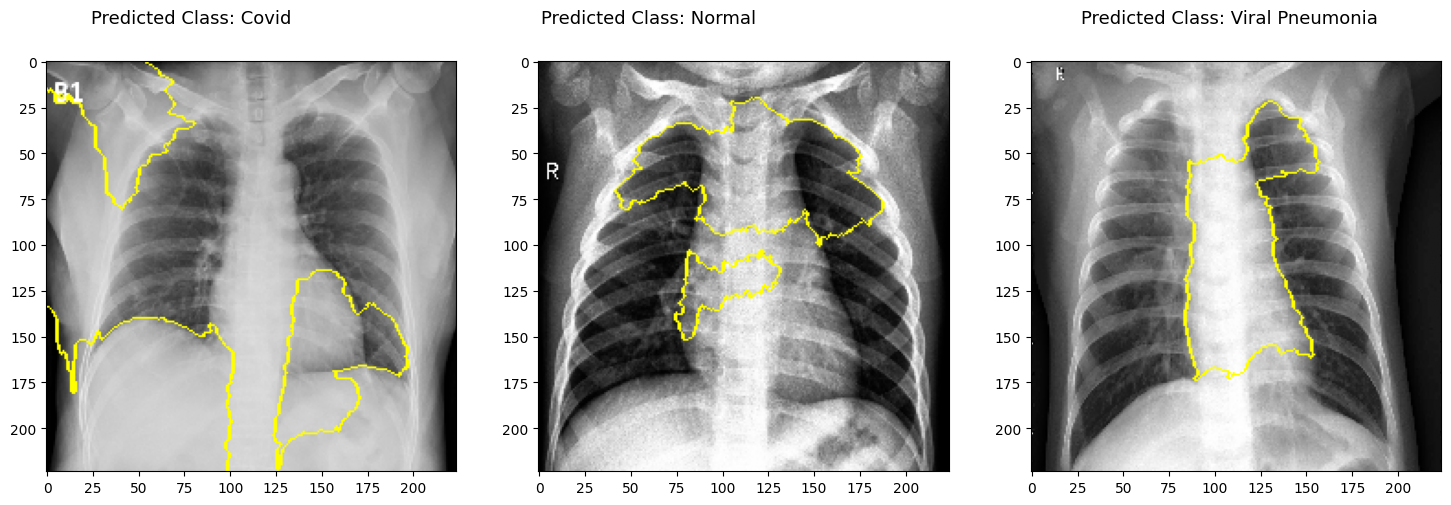

In [144]:
fig,ax = plt.subplots(1,3,figsize=(18,6))
visualize('/test/Covid/094.png',ax[0],0.15)
visualize('/test/Normal/0105.jpeg',ax[1],0.4)
visualize('/test/Viral Pneumonia/0120.jpeg',ax[2],0.7)